# Contents:

    1. Clustering
        1. K-Means Clustering
        2. Hierarchical Clustering

# Clustering:

## K-Means Clustering:

Creates groupings for us based on the variables we input, we go through the following steps for it:

* Decide on the number of Clusters
* Decide at random K points that are the centroid for the clusters
* Assign each data point to each closest centroid
* Compute and place the new centroid of each cluster
* Reassign each data point to the new closest centroid (If re-assignment took place loop from step 4)

Determining the Number of clusters:

We use the Within Clusters Sum of Squares to determine the ideal number of squares. The maximum number of clusters we can have is equal to the number of data points we have in our data set. We don't have a hard rule for what is an ideal WCS value but rather we should be looking at the drop in the WCSS as we increase the number of clusters.

The method we use is the Elbow method - we look for the point where the drop is substantial to not substancial

Let's have a look at an example of this:

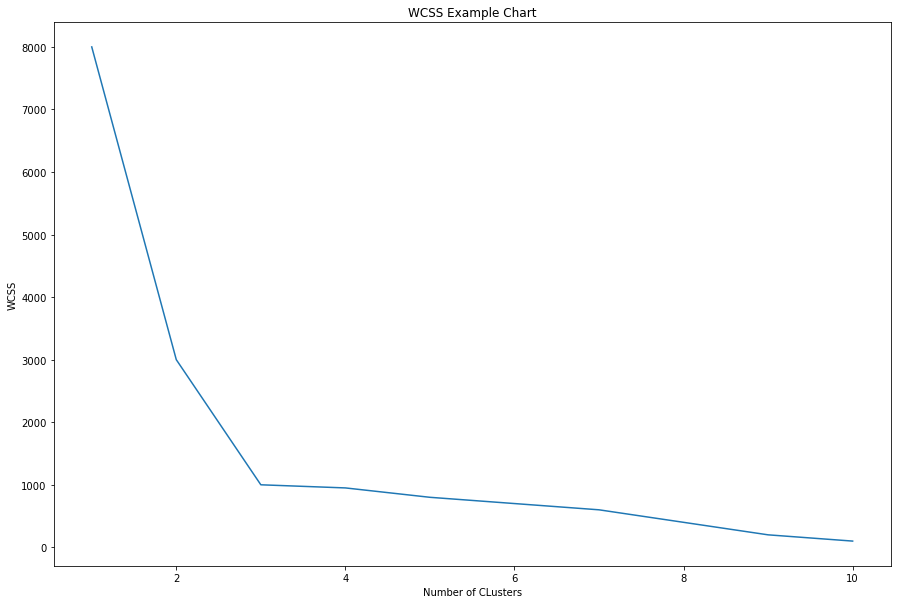

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

WCSS_x = [1,2,3,4,5,6,7,8,9,10]
WCSS_Y=[8000,3000,1000,950,800,700,600,400,200,100]

plt.figure(figsize=(15,10))
plt.plot(WCSS_x,WCSS_Y)
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.title("WCSS Example Chart")
plt.show()

From the example chart we can say that the elbow point is at 3 clusters and this should be the maximum we use.

The example dataset we will be using is based on looking at different customers based on their income and spending Score or how much they spend at a mall.

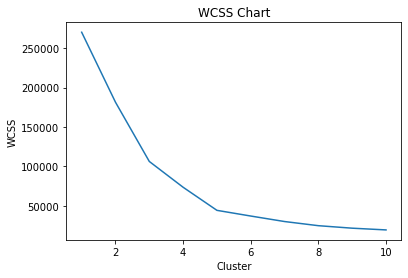

In [8]:
dataset = pd.read_csv('data\Mall_Customers.csv')

dataset.describe()

x = dataset.iloc[:,3:]

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("WCSS Chart")
plt.xlabel("Cluster")
plt.ylabel("WCSS")
plt.show()

We can see 5 clusters seems to be an ideal cut off.

So let's now fit the Kmeans with 5 clusters

In [9]:
kmeans = KMeans(n_clusters=5,random_state=0)
y_kmeans=kmeans.fit_predict(x)

Let's now have a scatter plot of the observations:

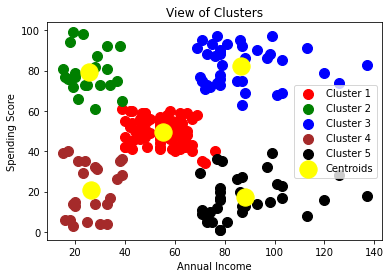

In [10]:
plt.scatter(x.iloc[y_kmeans==0,0],x.iloc[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_kmeans==1,0],x.iloc[y_kmeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x.iloc[y_kmeans==2,0],x.iloc[y_kmeans==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(x.iloc[y_kmeans==3,0],x.iloc[y_kmeans==3,1],s=100,c='brown',label='Cluster 4')
plt.scatter(x.iloc[y_kmeans==4,0],x.iloc[y_kmeans==4,1],s=100,c='black',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("View of Clusters")
plt.show()

## Hierarchical Clustering

For this example we will be using the Mall customers data again to calculate a Hierarchical Clustering method.

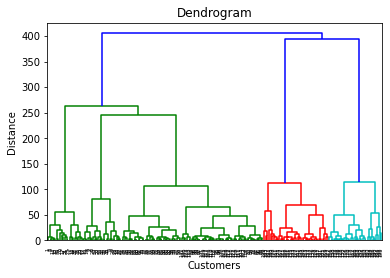

In [11]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

if we look for the largest distance that we don't cross a horizontal line we can say that the optimal number of clusters is 5.

We can now fit the data:

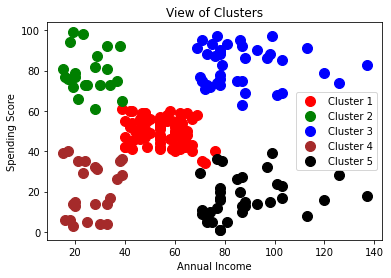

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc_tool = AgglomerativeClustering(n_clusters=5)
y_means=hc_tool.fit_predict(x)

plt.scatter(x.iloc[y_kmeans==0,0],x.iloc[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x.iloc[y_kmeans==1,0],x.iloc[y_kmeans==1,1],s=100,c='green',label='Cluster 2')
plt.scatter(x.iloc[y_kmeans==2,0],x.iloc[y_kmeans==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(x.iloc[y_kmeans==3,0],x.iloc[y_kmeans==3,1],s=100,c='brown',label='Cluster 4')
plt.scatter(x.iloc[y_kmeans==4,0],x.iloc[y_kmeans==4,1],s=100,c='black',label='Cluster 5')
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("View of Clusters")
plt.show()


